## Happiness Metrics for Global Life Expectancy Predictive Analysis
Nicole Chang, Sourish Guntipally, Aaron Park, Brandon To

Data used for this project is from Kaggle datasets of the [World Happiness Report](https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv) and [Human Life Expectancy Around the World](https://www.kaggle.com/deepcontractor/human-life-expectancy-around-the-world).

The years we are analyzing are from 2015 - 2019.

In [1070]:
import scipy as sp, numpy as np, pandas as pd
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import LeaveOneGroupOut, LeaveOneOut
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [1071]:
#World Happiness Report (WHR)
#Human Life Expectancy Around the World (HLE)
#Use command below to show all elements in a dataframe
#pd.set_option("display.max_rows", None, "display.max_columns", None)

#HLE
dataHLE = pd.read_csv('Human_life_Expectancy.csv')

#2015 data
dataWHR2015 = pd.read_csv('2015.csv') #WHR

#2016 data
dataWHR2016 = pd.read_csv('2016.csv') #WHR

#2017 data
dataWHR2017 = pd.read_csv('2017.csv') #WHR

#2018 data
dataWHR2018 = pd.read_csv('2018.csv') #WHR

#2019 data
dataWHR2019 = pd.read_csv('2019.csv') #WHR

In [1072]:
#Configuring HLE dataframe
dataHLE_NSN = dataHLE.set_index('Level')
dataHLE_NSN = dataHLE_NSN.drop('subnational')

In [1073]:
#Configuring data into dataframes that are easier to use 

#Labels are the names of the measurements (countries) for all 5 years
labels = [dataWHR2015['Country'].astype(str), dataWHR2016['Country'].astype(str), dataWHR2017['Country'].astype(str),dataWHR2018['Country'].astype(str), dataWHR2019['Country'].astype(str), dataHLE_NSN['Country'].astype(str)] 
#dictionary to track countries participation in all 5 years
recurringCountries = {}

for i in range(len(dataWHR2015['Country'])):
    recurringCountries[labels[0][i]] = 1

for year in range(5):                                                      #Iterates for each year after 2015
    for countryind in range(len(dataWHR2015['Country'])):                  #Iterates through country labels for 2015
        for matchind in range(len(labels[year+1][:])):                     #Finds matches between 2015 label and other years
            if labels[0][countryind] == labels[year+1][matchind]:
                recurringCountries[labels[0][countryind]] += 1

#delete all the countries that don't appear in every year out of the dictionary
for i in range(len(recurringCountries)):
    if recurringCountries[labels[0][i]] < 6:
        recurringCountries.pop(labels[0][i])


In [1074]:
#creating lists of the countries to delete using the WHR dictionary 
del_countries2015 = []

for i in range(len(dataWHR2015['Country'])):
    if labels[0][i] not in recurringCountries:
        del_countries2015.append(labels[0][i])

del_countries2016 = []

for i in range(len(dataWHR2016['Country'])):
    if labels[1][i] not in recurringCountries:
        del_countries2016.append(labels[1][i])

del_countries2017 = []

for i in range(len(dataWHR2017['Country'])):
    if labels[2][i] not in recurringCountries:
        del_countries2017.append(labels[2][i])
        
del_countries2018 = []

for i in range(len(dataWHR2018['Country'])):
    if labels[3][i] not in recurringCountries:
        del_countries2018.append(labels[3][i])
        
del_countries2019 = []

for i in range(len(dataWHR2019['Country'])):
    if labels[4][i] not in recurringCountries:
        del_countries2019.append(labels[4][i])

del_countriesHLE = []

for i in range(len(dataHLE_NSN['Country'])):
    if labels[5][i] not in recurringCountries:
        del_countriesHLE.append(labels[5][i])

In [1075]:
#feel free to rename these dataframes
#new dataframes with dropped countries
#Syria does not appear in HLE which is why it is dropped in all other dataframes

dfWHR2015 = dataWHR2015.set_index('Country')
dfWHR2015 = dfWHR2015.drop(del_countries2015)
dfWHR2015 = dfWHR2015.drop('Syria')
dfWHR2015 = dfWHR2015.reset_index()

dfWHR2016 = dataWHR2016.set_index('Country')
dfWHR2016 = dfWHR2016.drop(del_countries2016)
dfWHR2016 = dfWHR2016.drop('Syria')
dfWHR2016 = dfWHR2016.reset_index()

dfWHR2017 = dataWHR2017.set_index('Country')
dfWHR2017 = dfWHR2017.drop(del_countries2017)
dfWHR2017 = dfWHR2017.drop('Syria')
dfWHR2017 = dfWHR2017.reset_index()

dfWHR2018 = dataWHR2018.set_index('Country')
dfWHR2018 = dfWHR2018.drop(del_countries2018)
dfWHR2018 = dfWHR2018.drop('Syria')
dfWHR2018 = dfWHR2018.reset_index()

dfWHR2019 = dataWHR2019.set_index('Country')
dfWHR2019 = dfWHR2019.drop(del_countries2019)
dfWHR2019 = dfWHR2019.drop('Syria')
dfWHR2019 = dfWHR2019.reset_index()


dfHLE = dataHLE_NSN.set_index('Country')
dfHLE = dfHLE.drop(del_countriesHLE)
dfHLE = dfHLE.drop('Syria')
dfHLE = dfHLE.reset_index()

dfHLE2015 = dfHLE['2015'] #data frame HLE 2015
dfHLE2016 = dfHLE['2016'] #data frame HLE 2016
dfHLE2017 = dfHLE['2017'] #data frame HLE 2017
dfHLE2018 = dfHLE['2018'] #data frame HLE 2018
dfHLE2019 = dfHLE['2019'] #data frame HLE 2019


In [1076]:
# if you want to drop columns, here's an example below
#data_with_index1 = data_with_index1.drop(['Region', 'Standard Error'], axis=1)

In [1077]:
# To alphabetize, follow below example.
# I left it like this so that we can call sort_values when needed. 
# Should just keep the main data frame sorted by overall rank by default
#data_with_index1.sort_values('Country') #sorting A-Z
#data_with_index1.sort_values('Country', ascending=False) #sorting Z-A

In [1078]:
#To exclude certain columns
#dfWHR2015.loc[:, ~dfWHR2015.columns.isin(['Country', 'Region', 'Overall Rank'])]

#To exclude one column
#dfWHR2015.loc[:, dfWHR2015.columns != 'Country']

In [1079]:
#Removing columns

dfWHR2015 = dfWHR2015.drop(['Overall Rank', 'Region', 'Standard Error', 'Healthy life expectancy', 'Dystopia Residual'], axis=1)
dfWHR2016 = dfWHR2016.drop(['Overall Rank', 'Region', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Healthy life expectancy', 'Dystopia Residual'], axis=1)
dfWHR2017 = dfWHR2017.drop(['Overall Rank', 'Whisker.high', 'Whisker.low', 'Healthy life expectancy', 'Dystopia Residual'], axis=1)
dfWHR2018 = dfWHR2018.drop(['Overall rank', 'Healthy life expectancy'], axis=1)
dfWHR2019 = dfWHR2019.drop(['Overall rank', 'Healthy life expectancy'], axis=1)

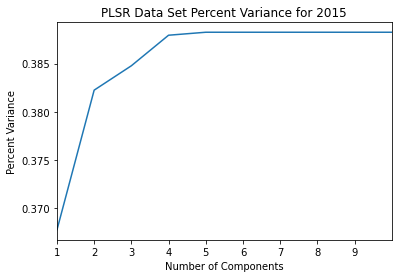

In [1080]:
#PLSR 2015
#133 total countries in each dataframe
Y_WHRHLE2015 = pd.concat([dfWHR2015, dfHLE2015], axis=1)
tempdfWHR2015 = dfWHR2015.drop('Happiness Score', axis=1)
X2015 = tempdfWHR2015.values[:, 1:]
Y2015 = Y_WHRHLE2015[['Happiness Score', '2015']]
r2y2015 = np.zeros(133)

for i in range(0,133):
    plsrModel2015 = PLSRegression(n_components=i)
    plsrModel2015.fit(X2015, Y2015)
    r2y2015[i] = plsrModel2015.score(X2015,Y2015)

plt.plot(range(0,133), r2y2015)
plt.xlim(1,10)
plt.xticks(np.arange(1,10,1))
plt.xlabel('Number of Components')
plt.ylabel('Percent Variance')
plt.title('PLSR Data Set Percent Variance for 2015')
plt.show()

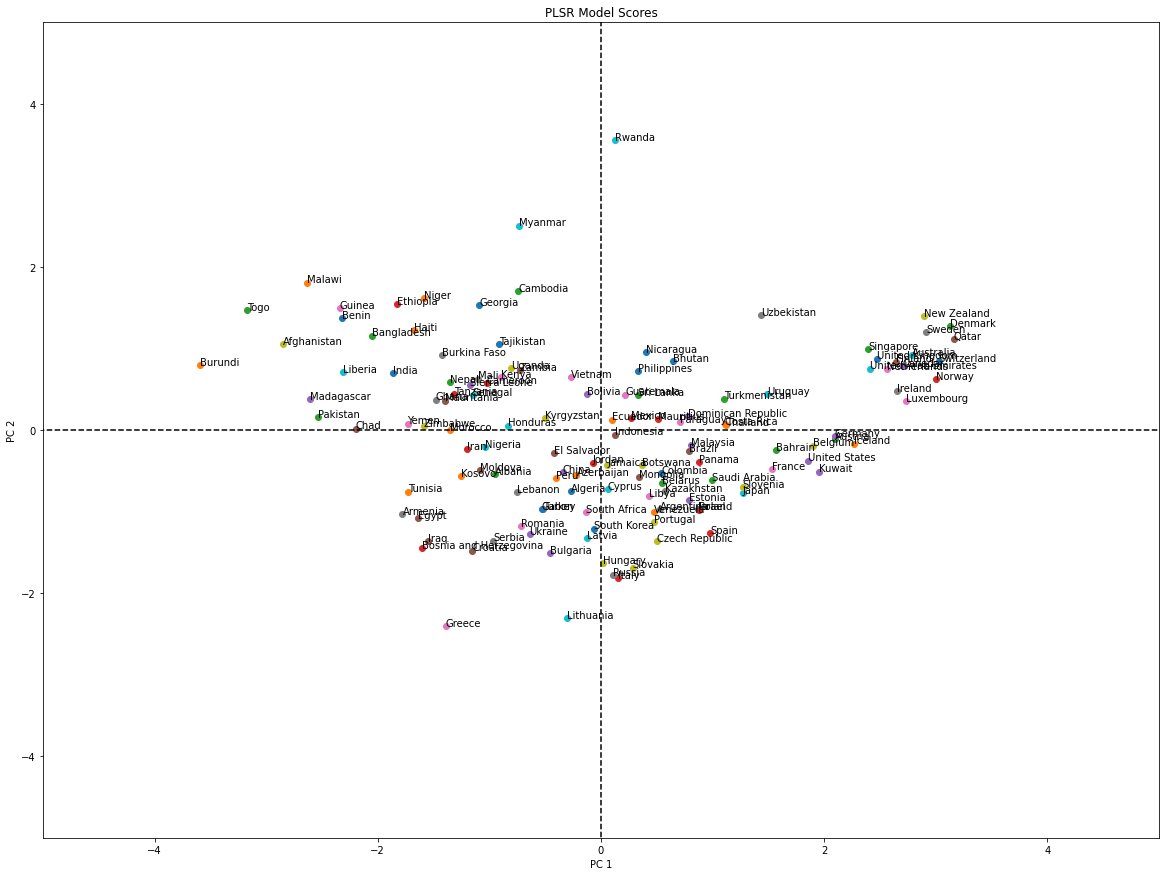

In [1081]:
xScores2015 = plsrModel2015.x_scores_
yScores2015 = plsrModel2015.y_scores_
plt.figure(figsize=(20,15))

for i in range(0, 133):
    plt.scatter(xScores2015[i, 0], xScores2015[i, 1], label=dfWHR2015['Country'][i])
    plt.annotate(dfWHR2015['Country'][i], (xScores2015[i,0], xScores2015[i,1]))

plt.plot([0,0], [-10, 10], linestyle='--', color='k')
plt.plot([-10,10], [0,0], linestyle='--', color='k')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PLSR Model Scores')
#plt.legend(bbox_to_anchor=(1.05,1.0), loc=2, prop={'size': 7}, ncol=4)
plt.show()


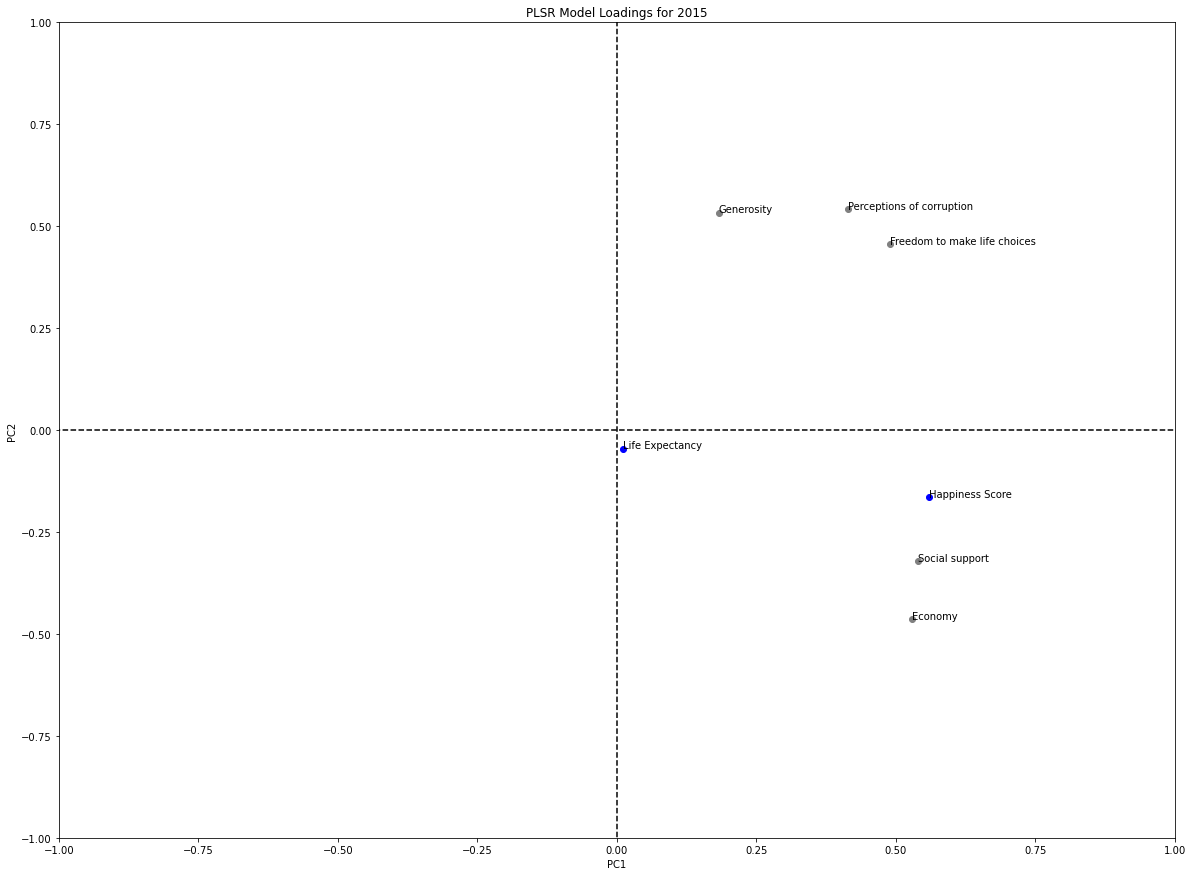

In [1082]:
xLoad2015 = plsrModel2015.x_loadings_
yLoad2015 = plsrModel2015.y_loadings_

plt.figure(figsize=(20,15))
plt.scatter(xLoad2015[:,0], xLoad2015[:,1], c='gray')
plt.scatter(yLoad2015[:,0], yLoad2015[:,1], c='blue')
plt.annotate('Happiness Score', (yLoad2015[0,0], yLoad2015[0,1]))
plt.annotate('Life Expectancy', (yLoad2015[1,0], yLoad2015[1,1]))


labelArr = ['Economy', 'Social support', 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']

for i in range(xLoad2015.shape[0]):
        plt.text(xLoad2015[i,0], xLoad2015[i,1], labelArr[i])
        
plt.plot([0,0], [-5, 5], linestyle='--', color='k')
plt.plot([-5,5], [0,0], linestyle='--', color='k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PLSR Model Loadings for 2015')
plt.show()

------------

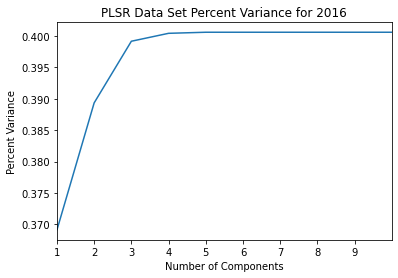

In [1083]:
#PLSR 2016
#133 total countries in each dataframe
Y_WHRHLE2016 = pd.concat([dfWHR2016, dfHLE2016], axis=1)
tempdfWHR2016 = dfWHR2016.drop('Happiness Score', axis=1)
X2016 = tempdfWHR2016.values[:, 1:]
Y2016 = Y_WHRHLE2016[['Happiness Score', '2016']]
r2y2016 = np.zeros(133)

for i in range(0,133):
    plsrModel2016 = PLSRegression(n_components=i)
    plsrModel2016.fit(X2016, Y2016)
    r2y2016[i] = plsrModel2016.score(X2016,Y2016)

plt.plot(range(0,133), r2y2016)
plt.xlim(1,10)
plt.xticks(np.arange(1,10,1))
plt.xlabel('Number of Components')
plt.ylabel('Percent Variance')
plt.title('PLSR Data Set Percent Variance for 2016')
plt.show()

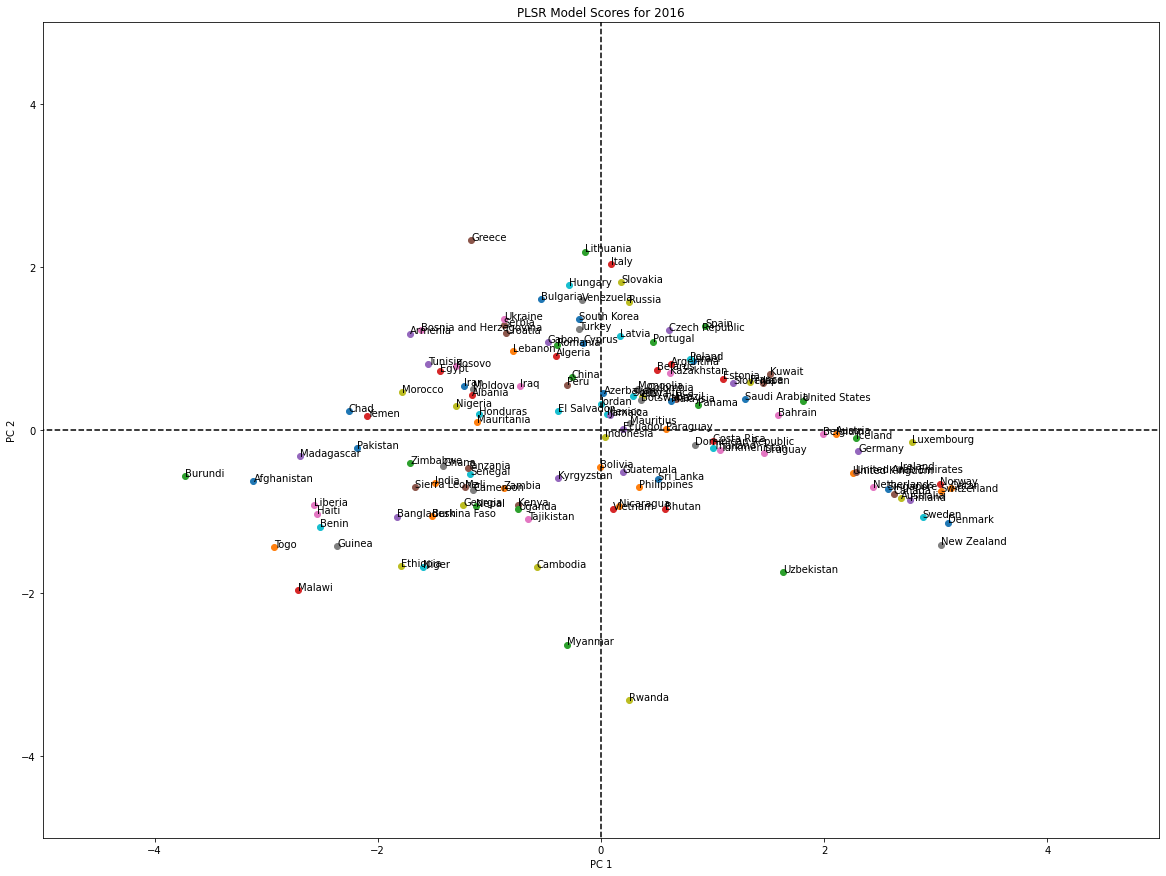

In [1084]:
xScores2016 = plsrModel2016.x_scores_
yScores2016 = plsrModel2016.y_scores_
plt.figure(figsize=(20,15))

for i in range(0, 133):
    plt.scatter(xScores2016[i, 0], xScores2016[i, 1], label=dfWHR2016['Country'][i])
    plt.annotate(dfWHR2016['Country'][i], (xScores2016[i,0], xScores2016[i,1]))

plt.plot([0,0], [-10, 10], linestyle='--', color='k')
plt.plot([-10,10], [0,0], linestyle='--', color='k')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PLSR Model Scores for 2016')
#plt.legend(bbox_to_anchor=(1.05,1.0), loc=2, prop={'size': 7}, ncol=4)
plt.show()

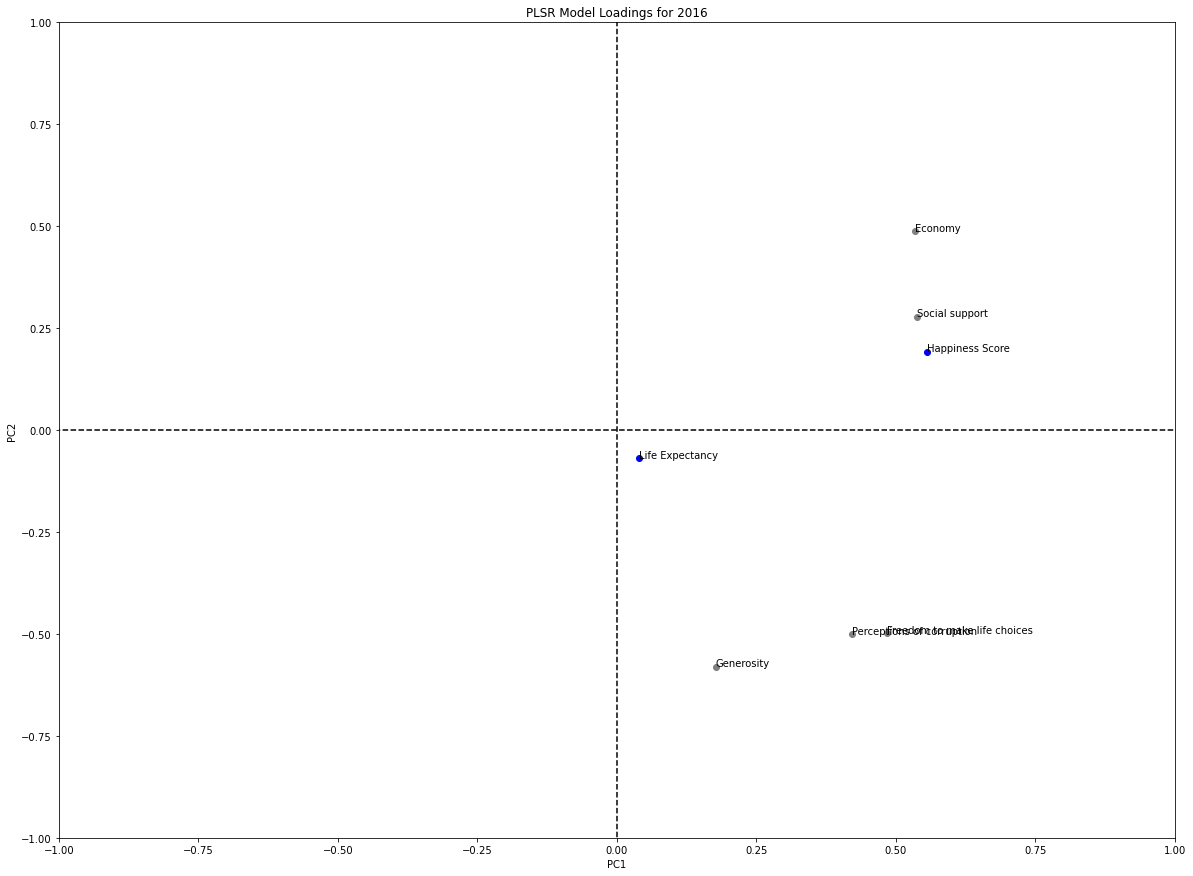

In [1085]:
xLoad2016 = plsrModel2016.x_loadings_
yLoad2016 = plsrModel2016.y_loadings_

plt.figure(figsize=(20,15))
plt.scatter(xLoad2016[:,0], xLoad2016[:,1], c='gray')
plt.scatter(yLoad2016[:,0], yLoad2016[:,1], c='blue')
plt.annotate('Happiness Score', (yLoad2016[0,0], yLoad2016[0,1]))
plt.annotate('Life Expectancy', (yLoad2016[1,0], yLoad2016[1,1]))


labelArr = ['Economy', 'Social support', 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']

for i in range(xLoad2016.shape[0]):
        plt.text(xLoad2016[i,0], xLoad2016[i,1], labelArr[i])
        
plt.plot([0,0], [-5, 5], linestyle='--', color='k')
plt.plot([-5,5], [0,0], linestyle='--', color='k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PLSR Model Loadings for 2016')
plt.show()

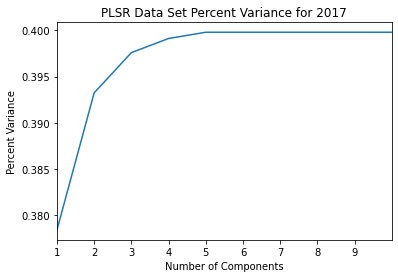

In [1086]:
#PLSR 2017
#133 total countries in each dataframe
Y_WHRHLE2017 = pd.concat([dfWHR2017, dfHLE2017], axis=1)
tempdfWHR2017 = dfWHR2017.drop('Happiness Score', axis=1)
X2017 = tempdfWHR2017.values[:, 1:]
Y2017 = Y_WHRHLE2017[['Happiness Score', '2017']]
r2y2017 = np.zeros(133)

for i in range(0,133):
    plsrModel2017 = PLSRegression(n_components=i)
    plsrModel2017.fit(X2017, Y2017)
    r2y2017[i] = plsrModel2017.score(X2017,Y2017)

plt.plot(range(0,133), r2y2017)
plt.xlim(1,10)
plt.xticks(np.arange(1,10,1))
plt.xlabel('Number of Components')
plt.ylabel('Percent Variance')
plt.title('PLSR Data Set Percent Variance for 2017')
plt.show()

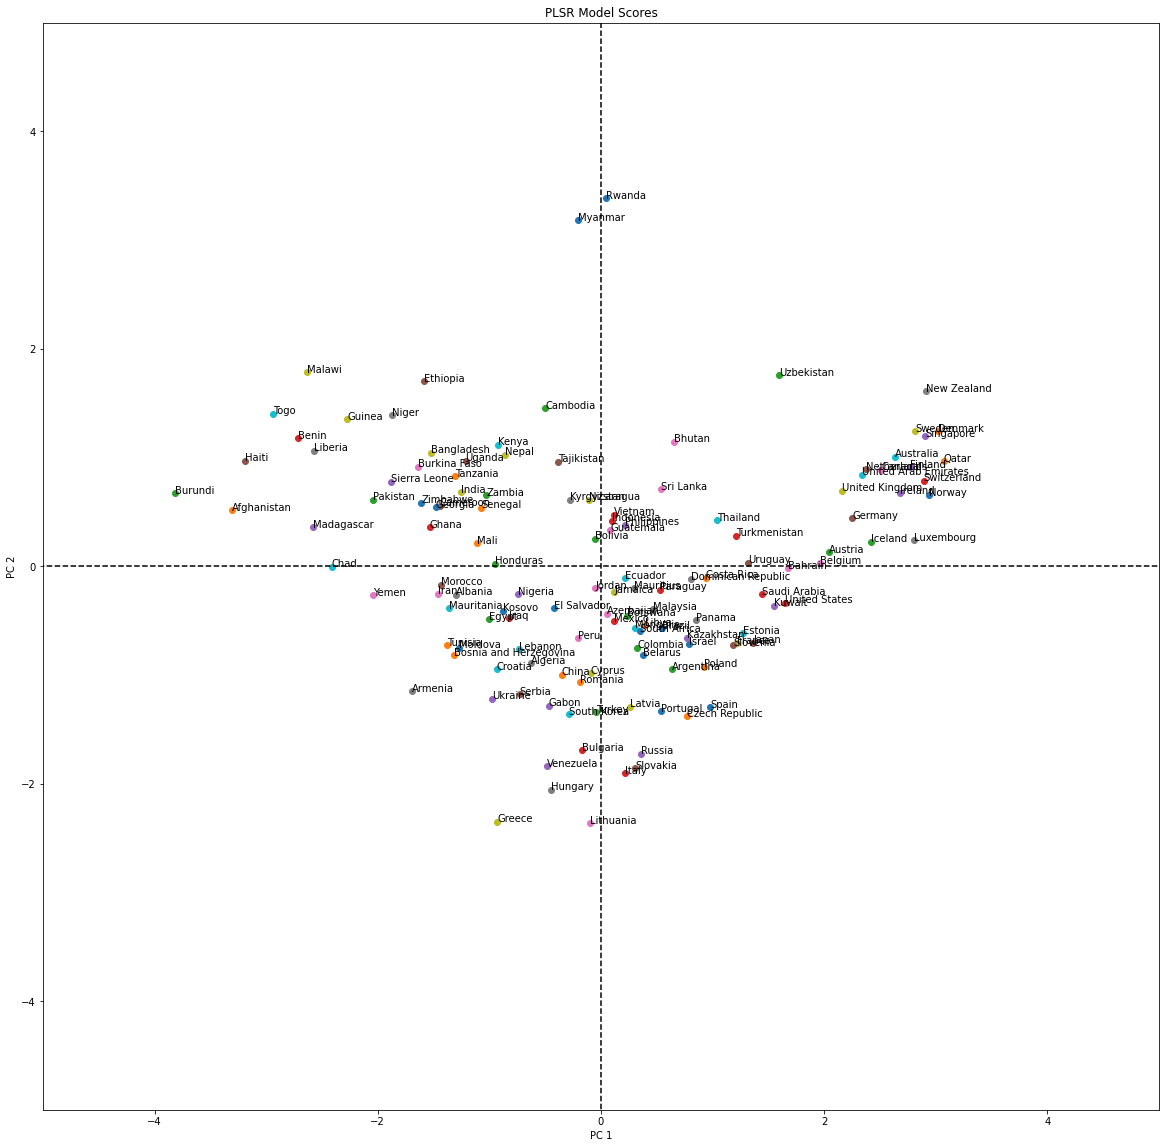

In [1087]:
xScores2017 = plsrModel2017.x_scores_
yScores2017 = plsrModel2017.y_scores_
plt.figure(figsize=(20,20))

for i in range(0, 133):
    plt.scatter(xScores2017[i, 0], xScores2017[i, 1], label=dfWHR2017['Country'][i])
    plt.annotate(dfWHR2017['Country'][i], (xScores2017[i,0], xScores2017[i,1]))

plt.plot([0,0], [-10, 10], linestyle='--', color='k')
plt.plot([-10,10], [0,0], linestyle='--', color='k')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PLSR Model Scores')
#plt.legend(bbox_to_anchor=(1.05,1.0), loc=2, prop={'size': 7}, ncol=4)
plt.show()

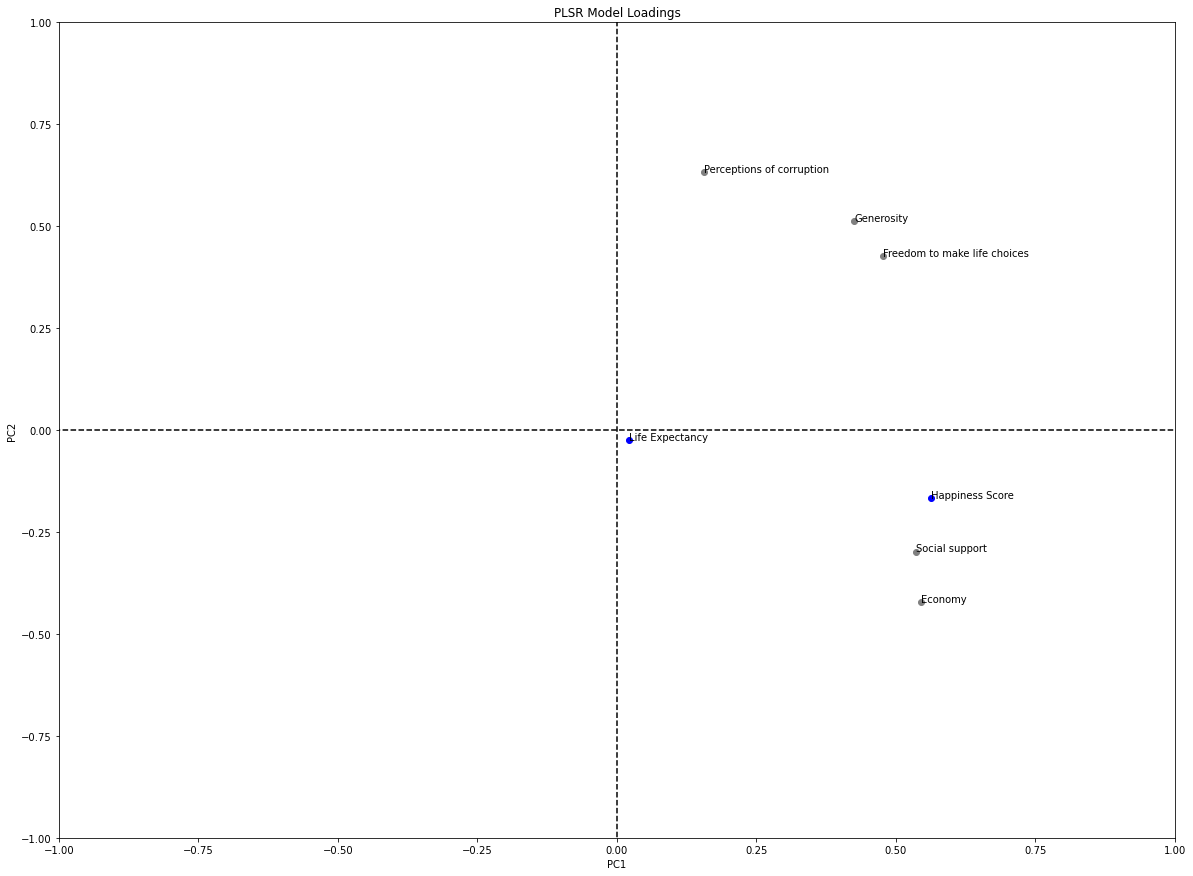

In [1088]:
xLoad2017 = plsrModel2017.x_loadings_
yLoad2017 = plsrModel2017.y_loadings_

plt.figure(figsize=(20,15))
plt.scatter(xLoad2017[:,0], xLoad2017[:,1], c='gray')
plt.scatter(yLoad2017[:,0], yLoad2017[:,1], c='blue')
plt.annotate('Happiness Score', (yLoad2017[0,0], yLoad2017[0,1]))
plt.annotate('Life Expectancy', (yLoad2017[1,0], yLoad2017[1,1]))


labelArr = ['Economy', 'Social support', 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']

for i in range(xLoad2017.shape[0]):
        plt.text(xLoad2017[i,0], xLoad2017[i,1], labelArr[i])
        
plt.plot([0,0], [-5, 5], linestyle='--', color='k')
plt.plot([-5,5], [0,0], linestyle='--', color='k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PLSR Model Loadings')
plt.show()

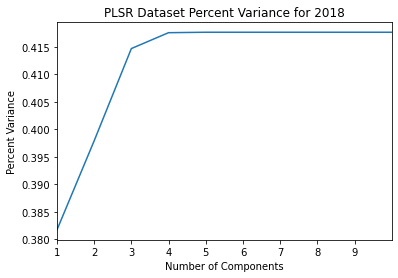

In [1089]:
#PLSR 2018
#133 total countries in each dataframe
Y_WHRHLE2018 = pd.concat([dfWHR2018, dfHLE2018], axis=1)
tempdfWHR2018 = dfWHR2018.drop('Happiness Score', axis=1)
X2018 = tempdfWHR2018.values[:, 1:]
Y2018 = Y_WHRHLE2018[['Happiness Score', '2018']]
r2y2018 = np.zeros(133)

for i in range(0,133):
    plsrModel2018 = PLSRegression(n_components=i)
    plsrModel2018.fit(X2018, Y2018)
    r2y2018[i] = plsrModel2018.score(X2018,Y2018)

plt.plot(range(0,133), r2y2018)
plt.xlim(1,10)
plt.xticks(np.arange(1,10,1))
plt.xlabel('Number of Components')
plt.ylabel('Percent Variance')
plt.title('PLSR Dataset Percent Variance for 2018')
plt.show()

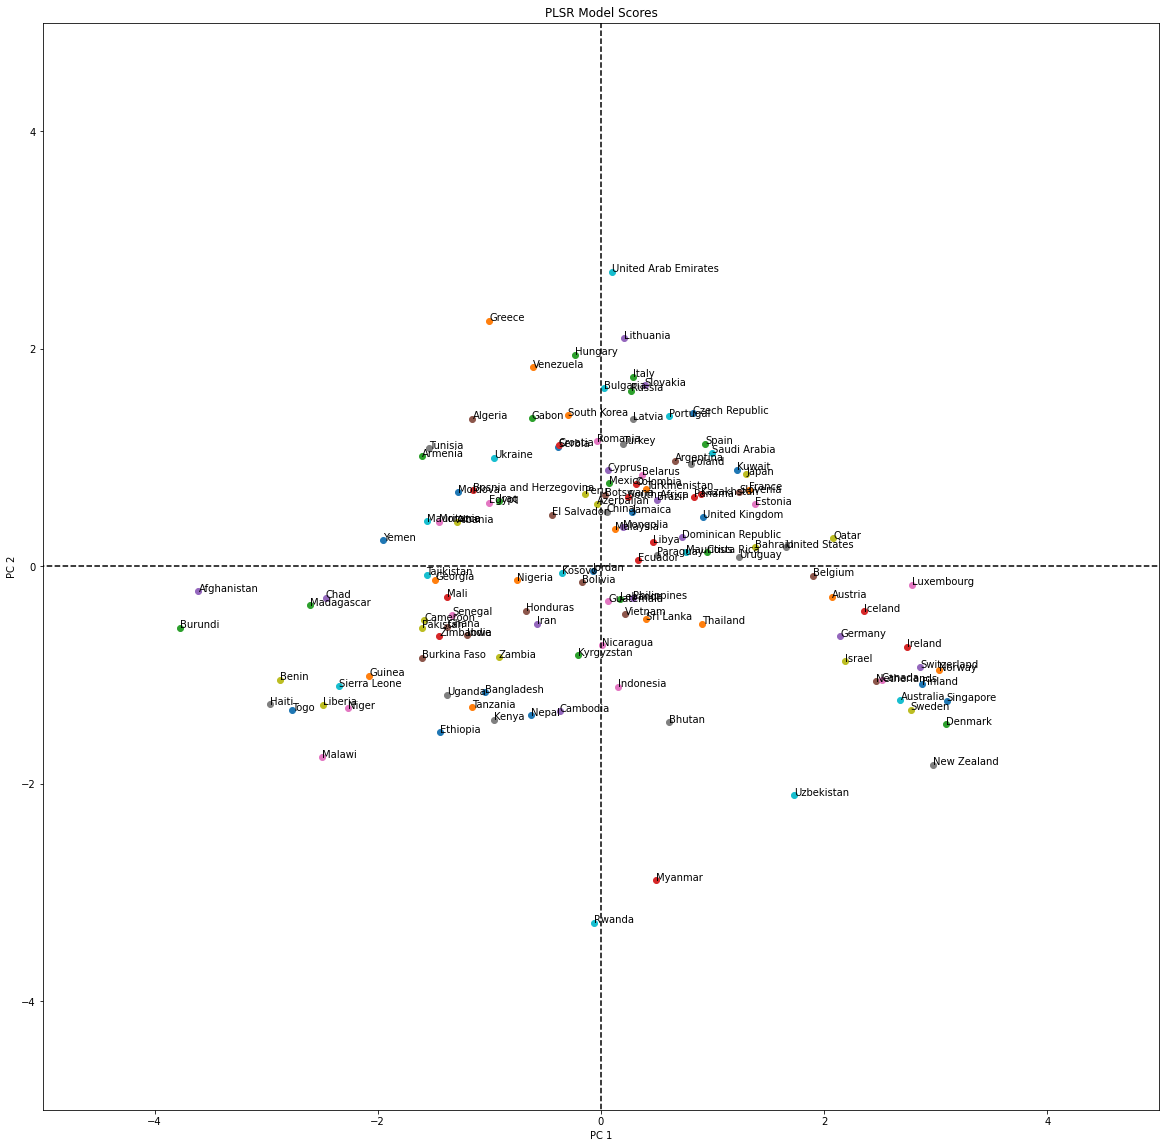

In [1090]:
xScores2018 = plsrModel2018.x_scores_
yScores2018 = plsrModel2018.y_scores_
plt.figure(figsize=(20,20))

for i in range(0, 133):
    plt.scatter(xScores2018[i, 0], xScores2018[i, 1], label=dfWHR2018['Country'][i])
    plt.annotate(dfWHR2018['Country'][i], (xScores2018[i,0], xScores2018[i,1]))

plt.plot([0,0], [-10, 10], linestyle='--', color='k')
plt.plot([-10,10], [0,0], linestyle='--', color='k')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PLSR Model Scores')
#plt.legend(bbox_to_anchor=(1.05,1.0), loc=2, prop={'size': 7}, ncol=4)
plt.show()

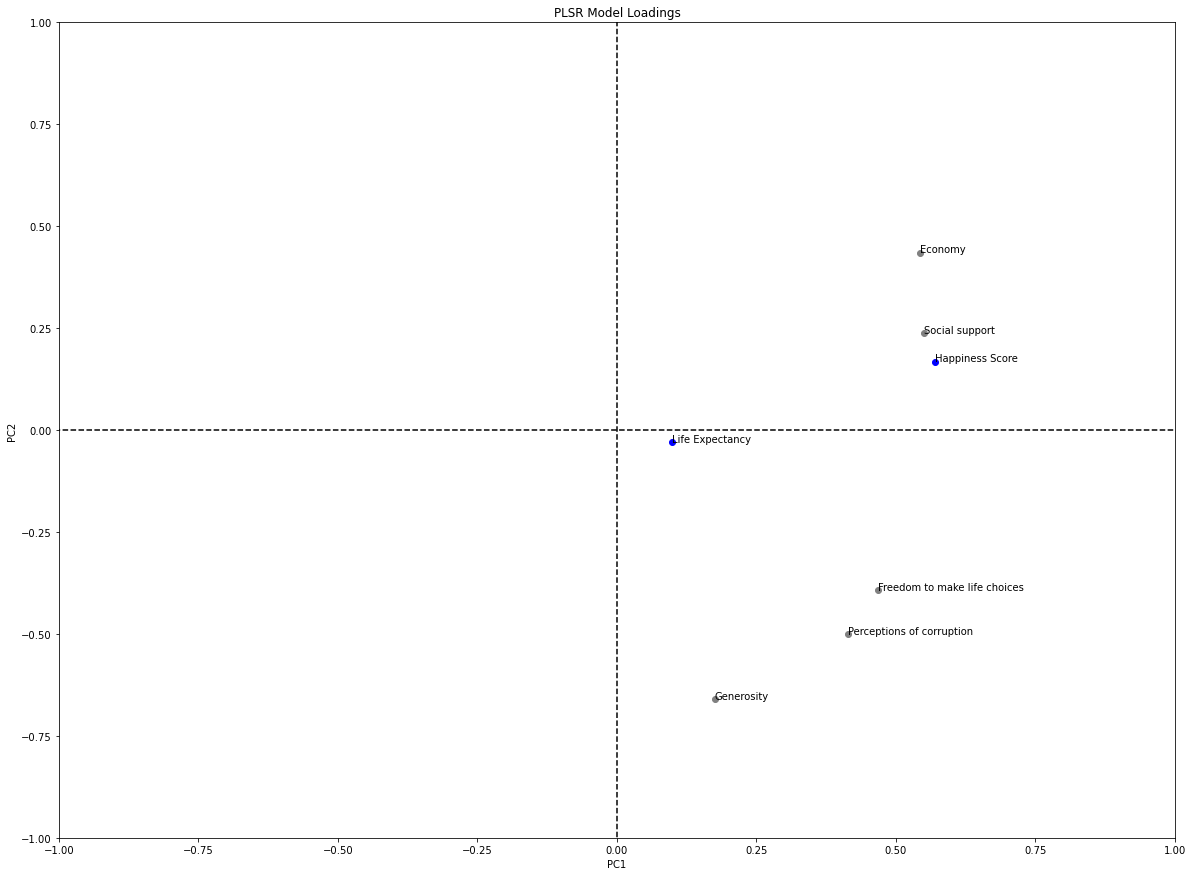

In [1091]:
xLoad2018 = plsrModel2018.x_loadings_
yLoad2018 = plsrModel2018.y_loadings_

plt.figure(figsize=(20,15))
plt.scatter(xLoad2018[:,0], xLoad2018[:,1], c='gray')
plt.scatter(yLoad2018[:,0], yLoad2018[:,1], c='blue')
plt.annotate('Happiness Score', (yLoad2018[0,0], yLoad2018[0,1]))
plt.annotate('Life Expectancy', (yLoad2018[1,0], yLoad2018[1,1]))


labelArr = ['Economy', 'Social support', 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']

for i in range(xLoad2018.shape[0]):
        plt.text(xLoad2018[i,0], xLoad2018[i,1], labelArr[i])
        
plt.plot([0,0], [-5, 5], linestyle='--', color='k')
plt.plot([-5,5], [0,0], linestyle='--', color='k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PLSR Model Loadings')
plt.show()

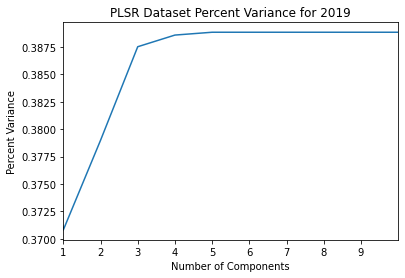

In [1093]:
#PLSR 2019
#133 total countries in each dataframe
Y_WHRHLE2019 = pd.concat([dfWHR2019, dfHLE2019], axis=1)
tempdfWHR2019 = dfWHR2019.drop('Happiness Score', axis=1)
X2019 = tempdfWHR2019.values[:, 1:]
Y2019 = Y_WHRHLE2019[['Happiness Score', '2019']]
r2y2019 = np.zeros(133)

for i in range(0,133):
    plsrModel2019 = PLSRegression(n_components=i)
    plsrModel2019.fit(X2019, Y2019)
    r2y2019[i] = plsrModel2019.score(X2019,Y2019)

plt.plot(range(0,133), r2y2019)
plt.xlim(1,10)
plt.xticks(np.arange(1,10,1))
plt.xlabel('Number of Components')
plt.ylabel('Percent Variance')
plt.title('PLSR Dataset Percent Variance for 2019')
plt.show()

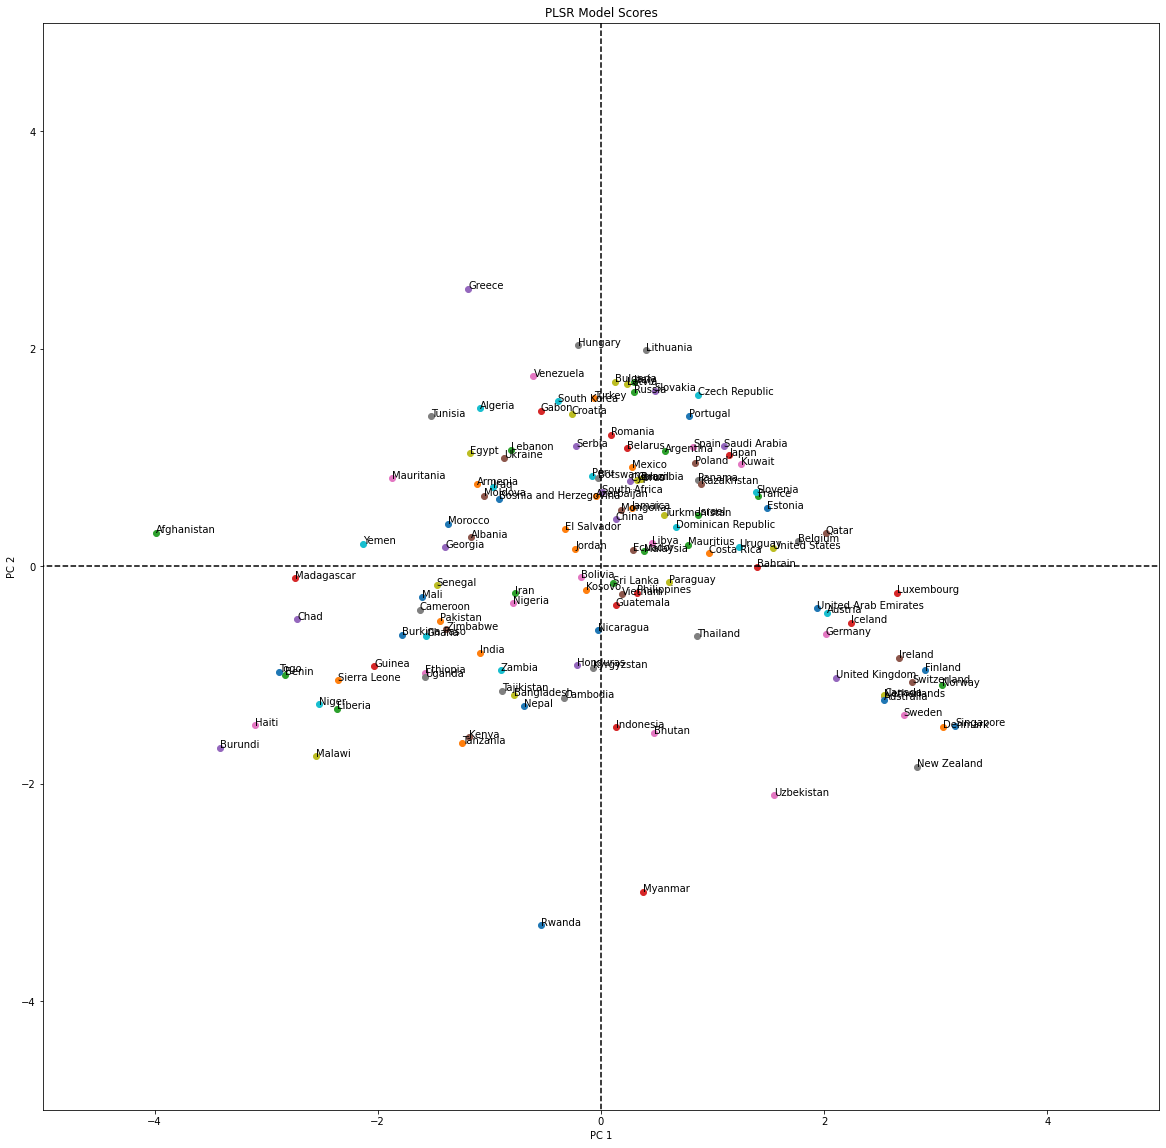

In [1094]:
xScores2019 = plsrModel2019.x_scores_
yScores2019 = plsrModel2019.y_scores_
plt.figure(figsize=(20,20))

for i in range(0, 133):
    plt.scatter(xScores2019[i, 0], xScores2019[i, 1], label=dfWHR2019['Country'][i])
    plt.annotate(dfWHR2019['Country'][i], (xScores2019[i,0], xScores2019[i,1]))

plt.plot([0,0], [-10, 10], linestyle='--', color='k')
plt.plot([-10,10], [0,0], linestyle='--', color='k')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PLSR Model Scores')
#plt.legend(bbox_to_anchor=(1.05,1.0), loc=2, prop={'size': 7}, ncol=4)
plt.show()


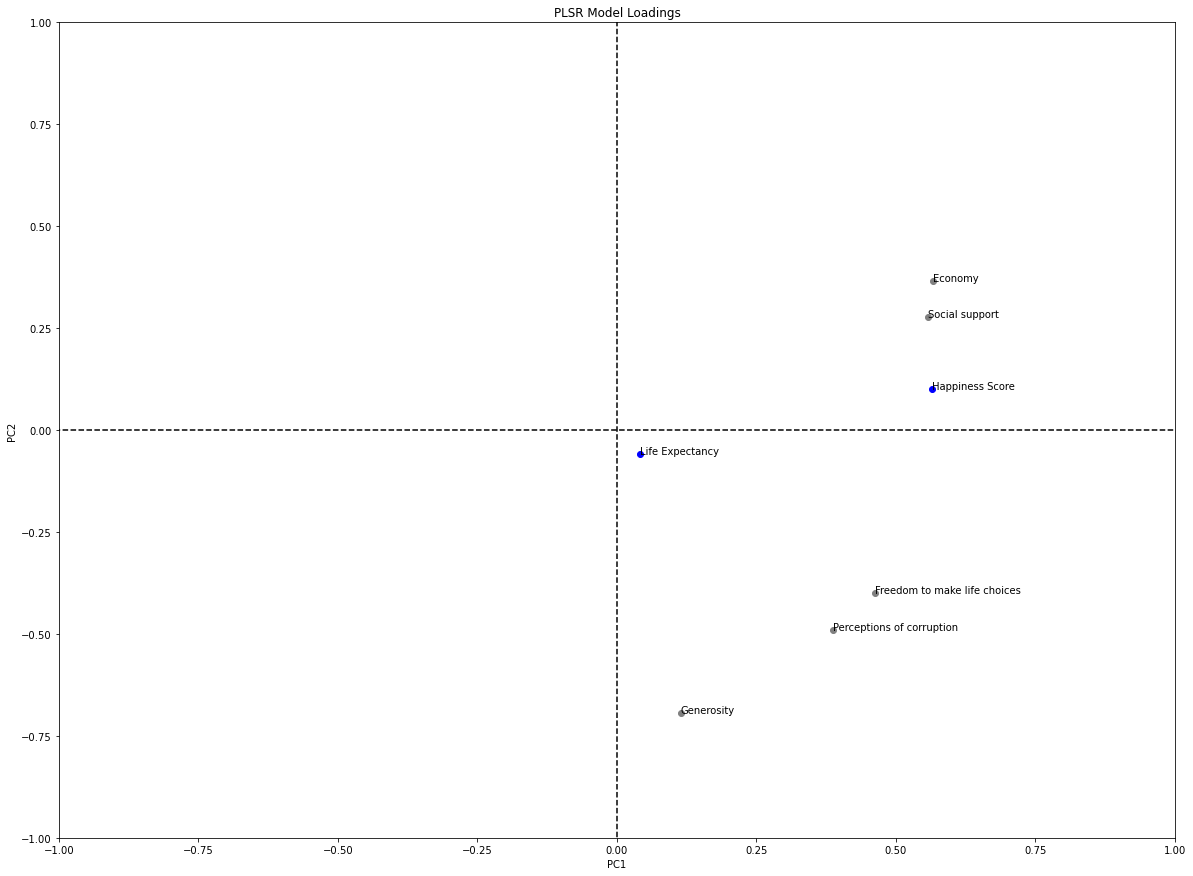

In [1095]:
xLoad2019 = plsrModel2019.x_loadings_
yLoad2019 = plsrModel2019.y_loadings_

plt.figure(figsize=(20,15))
plt.scatter(xLoad2019[:,0], xLoad2019[:,1], c='gray')
plt.scatter(yLoad2019[:,0], yLoad2019[:,1], c='blue')
plt.annotate('Happiness Score', (yLoad2019[0,0], yLoad2019[0,1]))
plt.annotate('Life Expectancy', (yLoad2019[1,0], yLoad2019[1,1]))


labelArr = ['Economy', 'Social support', 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']

for i in range(xLoad2019.shape[0]):
        plt.text(xLoad2019[i,0], xLoad2019[i,1], labelArr[i])
        
plt.plot([0,0], [-5, 5], linestyle='--', color='k')
plt.plot([-5,5], [0,0], linestyle='--', color='k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PLSR Model Loadings')
plt.show()